### 数据挖掘流程说明

流程分为：导入数据、数据预处理、数据分析展示、数据建模、模型评估、模型应用。本文简单用案例来演示整个流程。

其中用到的数据模型是 linear_model：使用线性回归方法库。这里只是用线性回归模型作为演示



### 案例

问题：案例场景：每个销售型公司都有一定的促销费用，促销费用可以带来销售量的显著提升。当给出一定的促销费用时，预计会带来多大的商品销售量？

In [42]:
# 导入库
import re
import numpy
from sklearn import linear_model
from matplotlib import pyplot as plt

In [43]:
# 导入数据
fn = open('/data.txt', 'r')
all_data = fn.readlines()
fn.close()

In [50]:
# 数据预处理
x_train = []
y_train = []
for single_data in all_data:
    tmp_data = re.split('\t|\n', single_data)
    x_train.append(float(tmp_data[0]))
    y_train.append(float(tmp_data[1]))

x_train = numpy.array(x).reshape([100, 1])
y_train = numpy.array(y).reshape([100, 1])

将数据分为 x_train，y_train 数组，也就是把 x_train 作为特征，把 y_train 作为标签。这里是直接把全部数据集作为训练组，方便后续模型训练

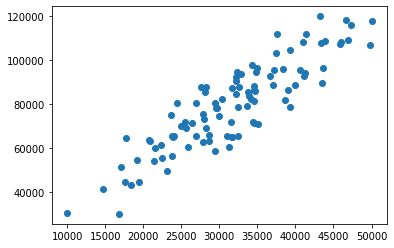

In [45]:
# 数据分析展示
plt.scatter(x_train, y_train)
plt.show()

通过散点图发现，x_train 与 y_train 的关系呈现明显的线性关系：当 x_train 增大时，y_train 增大；当 x_train 减小时，y_train 减小。初步判断可以选择线性回归进行模型拟合。

In [51]:
# 数据建模
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
# 模型评估

# 获取模型自变量的系数
model_coef = model.coef_

# 获取模型截距
model_intercept = model.intercept_

# r2_score 模型评估得分
r2 = model.score(x_train, y_train)
print(model_coef,model_intercept,r2)

[[2.09463661]] [13175.36904199] 0.7876414684758954


通过上述步骤我们可以获得线性回归方程 y = model_coef * x + model_intercept，即 y= 2.09463661 * x + 13175.36904199

In [61]:
# 模型应用，销售预测

# 假设促销费用是84610
new_x = 84610
pre_y = model.predict([[new_x]])
print (pre_y)

[[190402.57234225]]


new_x = 84610的作用是创建促销费用常量，用来做预测时的输入。代码pre_y=model.predict(new_x)的作用是将促销费用常量new_x输入模型进行预测，将预测结果赋值为pre_y，这就是预测的销售量。为了符合实际销量必须是整数的特点，后续可以对该数据做四舍五入。

到这里，就使用了简单的二维数组，使用线性回归模型，在没有调参的情况下，得出了预测值。

在实际运用中，还会遇到例如：
1. 数据是多维的情况，也就是特征值比较多的情况；
2. 数据量比较大，且数据类型不统一，那就需要对数据进行处理、数据标准化相关操作。也包括一些缺失值、异常值、重复值的处理；
3. 模型评估、模型得分环节，在实际情况中的选择更复杂，评估模式更加多样。

该案例来源于《Python数据分析与数据化运营》这本书，感兴趣的同学可以看看，全书内容比较实用。